In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import warnings
warnings.filterwarnings('ignore')

In [42]:
data=pd.read_csv('Email_spam_data.csv', encoding='latin-1')

In [43]:
df=pd.DataFrame(data)
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [44]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [45]:
# rename V1 and V2 to Email and label

df1=df.rename({'v1': 'label', 'v2': 'email'}, axis=1)

In [46]:
#Dropping the Unnamed columns

df2=df1.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [47]:
df2

,label,email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


average length of email: 80.119


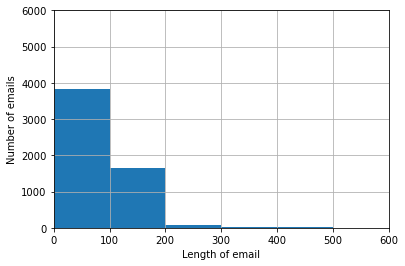

In [48]:
#Let us analyse the no. of emails having lengths varying from 0 to 600

x = [len(df2['email'][i]) for i in range(df2['email'].shape[0])]

print('average length of email: {:.3f}'.format(sum(x)/len(x)) )
bins = [1,100,200,300,400,500,600]
plt.hist(x, bins=bins)
plt.xlabel('Length of email')
plt.ylabel('Number of emails')       
plt.axis([0, 600, 0, 6000])
plt.grid(True)
plt.show()

<AxesSubplot:xlabel='label', ylabel='count'>

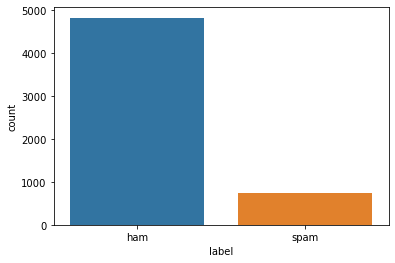

In [49]:
sns.countplot(df2['label'])

In [50]:
df2['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

From the above plot and table we can observe that the dataset has 4825 'ham' emails and 747 'spam' emails

In [51]:
df2.dtypes

label    object
email    object
dtype: object

<AxesSubplot:>

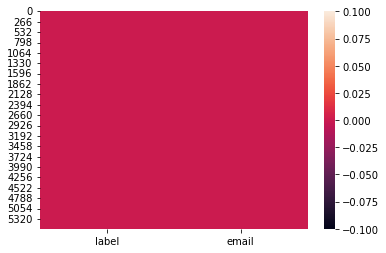

In [52]:
#checking for null data
sns.heatmap(df2.isnull())

In [53]:
df2.describe()

,label,email
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [54]:
x = df2['email']
y = df2['label']
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.25)

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
features = cv.fit_transform(x_train)

# SVC

In [56]:
from sklearn import svm

In [57]:
model = svm.SVC()
model.fit(features,y_train)

SVC()

In [58]:
features_test = cv.transform(x_test)
print("Accuracy: {}".format(model.score(features_test,y_test)*100))

Accuracy: 98.27709978463747


# DecisionTreeClassifier

In [59]:
dtc=DecisionTreeClassifier()
dtc.fit(features,y_train)

DecisionTreeClassifier()

In [60]:
features_test1 = cv.transform(x_test)
print("Accuracy: {}".format(dtc.score(features_test1,y_test)*100))

Accuracy: 97.20028715003589


# RandomForestClassifier

In [61]:
rfc=RandomForestClassifier()
rfc.fit(features,y_train)

RandomForestClassifier()

In [62]:
feature_test2=cv.transform(x_test)
print("Accuracy: {}".format(dtc.score(feature_test2,y_test)*100))

Accuracy: 97.20028715003589


We can see that svc is giving the best score of 97.91%, we can now do the parameter tuning for the same to check the best parameter

# Parameter Tuning

In [63]:
#Parameter tuning for SVC

from sklearn.model_selection import GridSearchCV
svc = svm.SVC()
params={'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
grd=GridSearchCV(estimator=svc,param_grid=params)
grd.fit(features,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [64]:
grd.best_score_

0.9827711085007019

In [65]:
grd.best_params_

{'kernel': 'linear'}

After parameter tuning we can observe that svc is giving best score of 98.2% with kernel = linear, we can now finalize the same 

# Final Model

In [66]:
final_model = svm.SVC(kernel='linear')
final_model.fit(features,y_train)

SVC(kernel='linear')

In [ ]:
features_test = cv.transform(x_test)
print("Accuracy: {}".format(final_model.score(features_test,y_test)*100))

Accuracy: 98.1335247666906


In [ ]:
# We can save the model now

import joblib
joblib.dump(final_model,'Email_spam_classifier.obj')